In [ ]:
from matplotlib.cm import get_cmap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import msdLib as msd

### Creating data set

In [9]:
np.random.seed(seed = 1216)

In [10]:
N = 100
data = pd.DataFrame(list(np.random.randint(10, 30, size = (N//2, 1))) + list(np.random.randint(40, 90, size = (N//2, 1))),
                    columns = ['w'])
data['x'] = list(np.random.randint(100, 130, size = (N//2))) + list(np.random.randint(110, 200, size = (N//2)))
data['y'] = np.random.randint(100, size = data.shape[0])
data['z'] = np.random.randint(1, 5, size = data.shape[0])
data.index = [pd.Timestamp('20200312090000') + pd.Timedelta(minutes = i * 2) for i in range(data.shape[0])]
data

,w,x,y,z
2020-03-12 09:00:00,10,105,96,2
2020-03-12 09:02:00,22,113,28,2
2020-03-12 09:04:00,11,119,37,1
2020-03-12 09:06:00,13,108,78,3
2020-03-12 09:08:00,19,124,63,4
2020-03-12 09:10:00,14,116,27,3
2020-03-12 09:12:00,19,100,18,3
2020-03-12 09:14:00,15,119,51,2
2020-03-12 09:16:00,28,123,34,3
2020-03-12 09:18:00,16,112,33,2


### data_gridplot

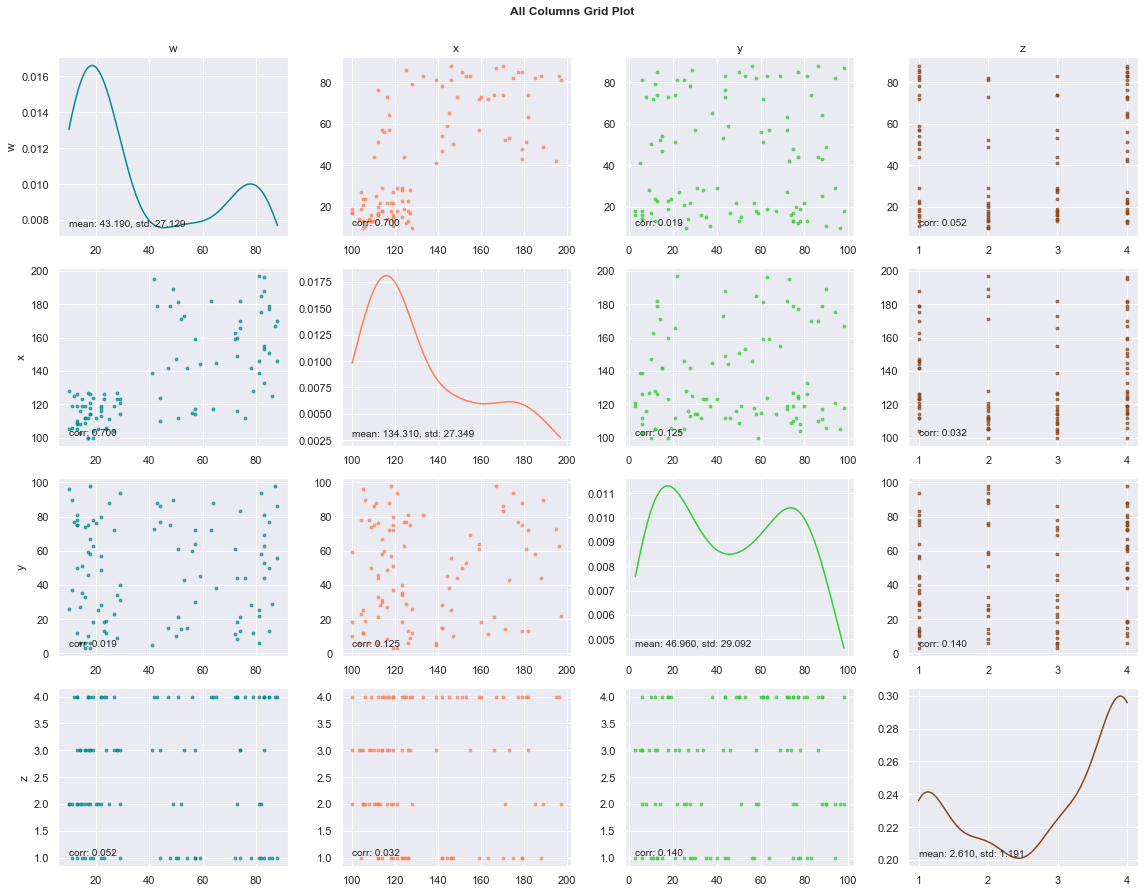

In [6]:
msd.data_gridplot(data, idf = [], idf_pref = '', idf_suff = '', diag = 'kde', figsize = (16, 12), alpha = .7, 
              s = 8, lg_font = 'x-small', lg_loc = 1, fig_title = '', show_corr = True, 
              show_stat = True, cmap = '')

### Identifier

Identifier is one special feature of this function. We often use clustering or divide data set into categories. There this identifier can be seen in the grid plot. Lets check that out.

In [11]:
identifier = pd.Series([1 if data['x'].iloc[i] > 130 else 0 for i in range(data.shape[0])], index = data.index)
identifier[(data['x'] >= 110) & (data['x'] <= 130)] = 2
identifier.value_counts()

2    45
1    39
0    16
dtype: int64

### with identifier

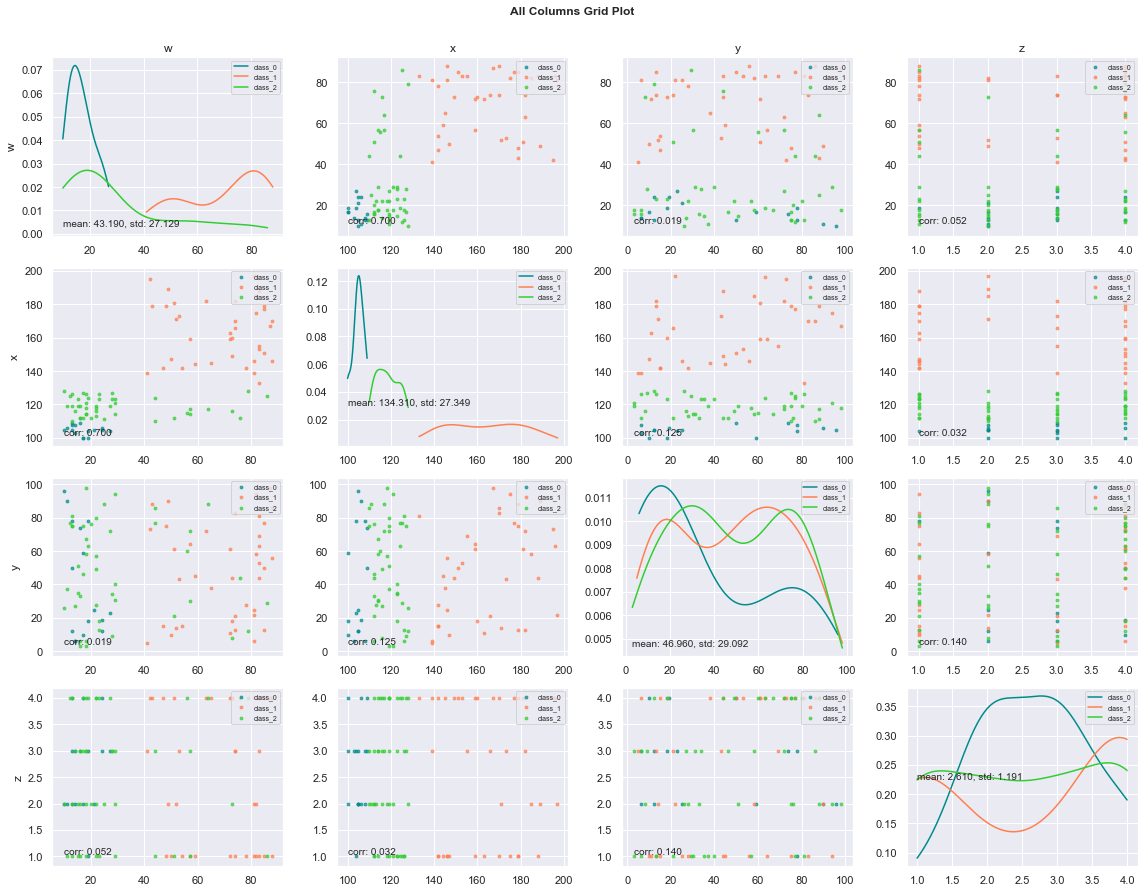

In [13]:
msd.data_gridplot(data, idf = identifier, idf_pref = 'class_', idf_suff = '', diag = 'kde', figsize = (16, 12), alpha = .7, 
              s = 8, lg_font = 'x-small', lg_loc = 1, fig_title = '', show_corr = True, 
              show_stat = True, cmap = '')